In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file_path = r'C:\Users\ADMIN\Documents\styles.csv'
data = pd.read_csv(file_path)


In [5]:
 #Check for null values
null_values = data.isnull().sum()
print("Null values per column:")
print(null_values)

Null values per column:
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image_name            0
dtype: int64


In [7]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [9]:
# Display DataFrame information
info = data.info()
print("\nNumber of duplicate rows:", duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44077 entries, 0 to 44076
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44077 non-null  int64  
 1   gender              44077 non-null  object 
 2   masterCategory      44077 non-null  object 
 3   subCategory         44077 non-null  object 
 4   articleType         44077 non-null  object 
 5   baseColour          44077 non-null  object 
 6   season              44077 non-null  object 
 7   year                44077 non-null  float64
 8   usage               44077 non-null  object 
 9   productDisplayName  44077 non-null  object 
 10  image_name          44077 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.7+ MB

Number of duplicate rows: 0


In [13]:
# Summary statistics for numeric columns
description = data.describe()
print("\nSummary Statistics:")
print(description)


Summary Statistics:
                 id          year
count  44077.000000  44077.000000
mean   29550.577444   2012.782041
std    16974.233378      2.108119
min     1163.000000   2007.000000
25%    14722.000000   2011.000000
50%    28491.000000   2012.000000
75%    44407.000000   2015.000000
max    60000.000000   2019.000000


In [15]:
# Find unique values in each column
unique_values = {col: data[col].nunique() for col in data.columns}
print("\nUnique Values in Each Column:")
for column, count in unique_values.items():
    print(f"{column}: {count} unique values")


Unique Values in Each Column:
id: 44077 unique values
gender: 5 unique values
masterCategory: 7 unique values
subCategory: 45 unique values
articleType: 142 unique values
baseColour: 46 unique values
season: 4 unique values
year: 13 unique values
usage: 8 unique values
productDisplayName: 30806 unique values
image_name: 44077 unique values


In [19]:
# Article types
article_types = data['articleType'].value_counts()
top_15_articles = article_types.head(15)# Assuming 'Article' is the column name
print("\nTop 15 Articles by Frequency:")
print(top_15_articles)


Top 15 Articles by Frequency:
articleType
Tshirts         7066
Shirts          3214
Casual Shoes    2845
Watches         2542
Sports Shoes    2016
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Wallets          928
Flip Flops       914
Sandals          895
Briefs           847
Belts            813
Name: count, dtype: int64


In [23]:
article_type_counts = data['articleType'].value_counts()
print(article_type_counts)


articleType
Tshirts                7066
Shirts                 3214
Casual Shoes           2845
Watches                2542
Sports Shoes           2016
                       ... 
Mens Grooming Kit         1
Cushion Covers            1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: count, Length: 142, dtype: int64


In [ ]:
import pandas as pd

# Load the CSV file
csv_path = r"C:\Users\ADMIN\Documents\styles.csv"
df = pd.read_csv(csv_path, on_bad_lines='skip')

# Handle null values
df.dropna(inplace=True)

# Add a new column 'image_name' with the format 'id.jpg'
if 'id' in df.columns:
    df['image_name'] = df['id'].astype(str) + '.jpg'
else:
    raise ValueError("The 'id' column is missing from the CSV file. Cannot create 'image_name'.")

# Save the updated DataFrame back to the same CSV file
df.to_csv(csv_path, index=False)

print(f"'image_name' column added and saved back to the same file: {csv_path}")


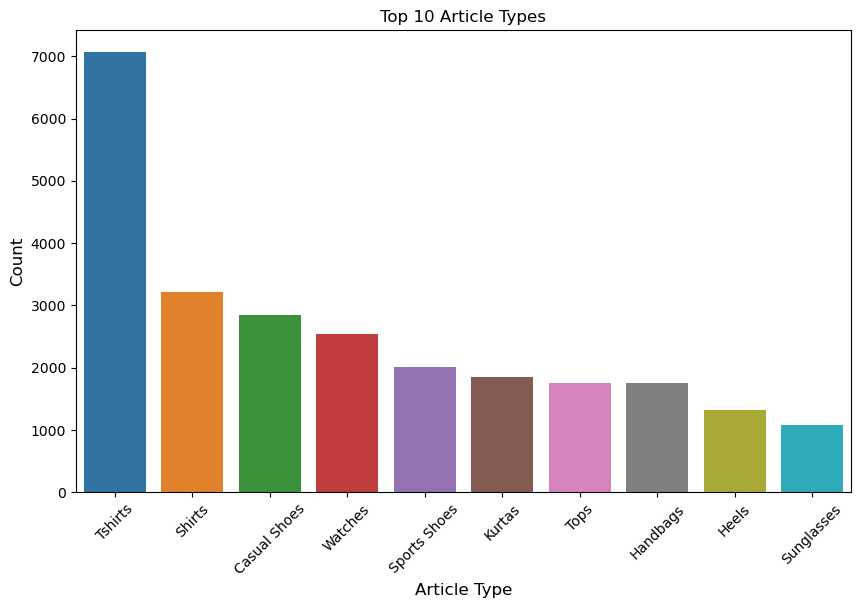

In [31]:


import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of article types
plt.figure(figsize=(10, 6))
sns.barplot(x=article_type_counts.index[:10], y=article_type_counts.values[:10])
plt.title("Top 10 Article Types")
plt.xlabel('Article Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


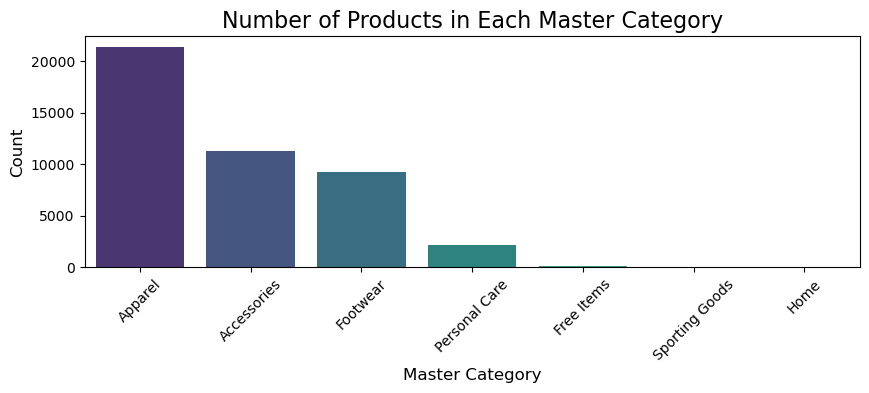

In [33]:
# Count the number of products per category
category_counts = df['masterCategory'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 3))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Number of Products in Each Master Category', fontsize=16)
plt.xlabel('Master Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

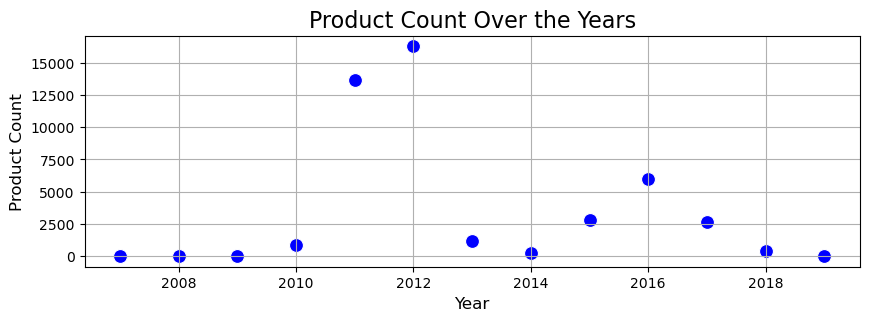

In [35]:
# Aggregate data by year


df['year'] = pd.to_datetime(df['year'], format='%Y')
yearly_counts = df.groupby('year').size()


     

# Aggregate data by year
year_counts = df.groupby('year').size().reset_index(name='product_count')

# Plot the scatter plot
plt.figure(figsize=(10, 3))
sns.scatterplot(data=year_counts, x='year', y='product_count', color='blue', s=100)
plt.title('Product Count Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.grid(True)
plt.show()


          year            articleType  count
0   2007-01-01           Casual Shoes      1
5   2008-01-01           Sports Shoes      2
8   2009-01-01           Casual Shoes      5
57  2010-01-01                Tshirts    351
117 2011-01-01                Tshirts   4164
212 2012-01-01                Tshirts   2298
228 2013-01-01           Casual Shoes    233
263 2014-01-01                    Bra     76
306 2015-01-01               Handbags    631
396 2016-01-01                Watches   2479
439 2017-01-01  Perfume and Body Mist    603
455 2018-01-01           Casual Shoes    175
472 2019-01-01               Lipstick     10


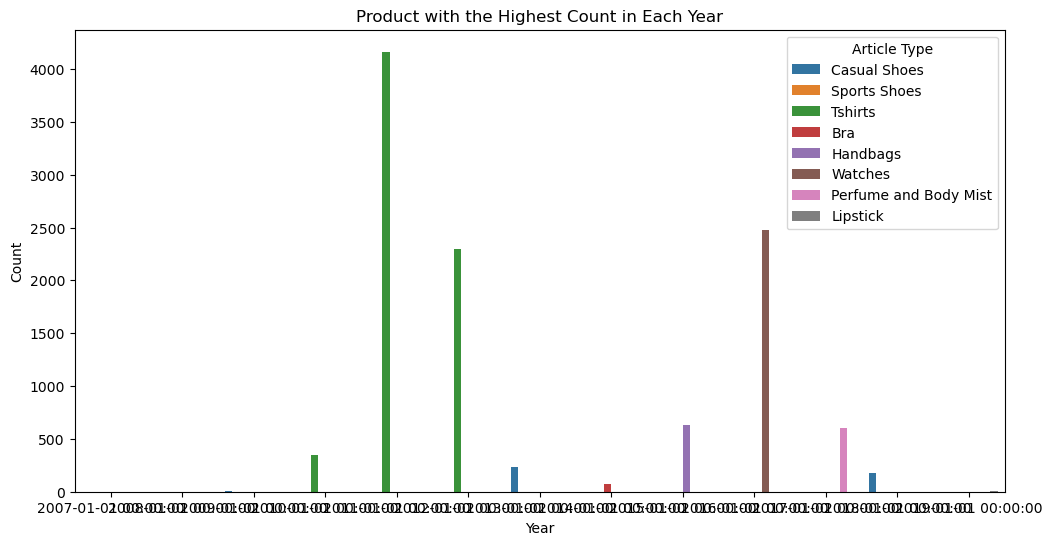

In [37]:
# Convert year to integer, handling missing values if any
# df['year'] = df['year'].astype('Int64')
# 1. Group by Year and Product Type:
product_counts = df.groupby(['year', 'articleType']).size().reset_index(name='count')
# 2. Find the Product with the Highest Count in Each Year:
highest_product_per_year = product_counts.loc[product_counts.groupby('year')['count'].idxmax()]
# 3. Display the Results:
print(highest_product_per_year)
# visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='count', hue='articleType', data=highest_product_per_year)
plt.title('Product with the Highest Count in Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Article Type')
plt.show()
     

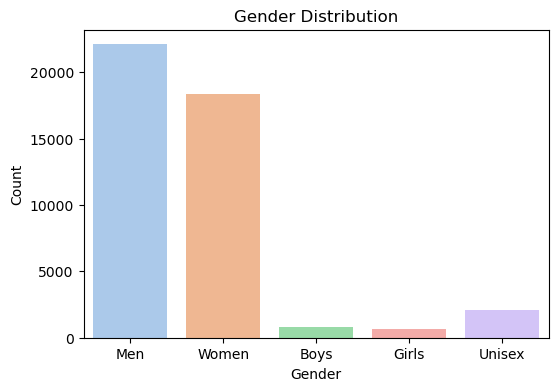

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

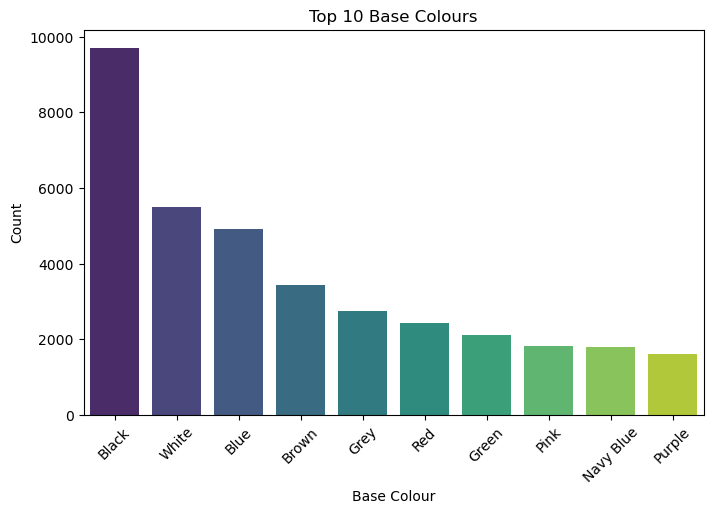

In [43]:

# Top 10 most common baseColours
top_colors = df['baseColour'].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_colors.index, y=top_colors.values, palette='viridis')
plt.title('Top 10 Base Colours')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

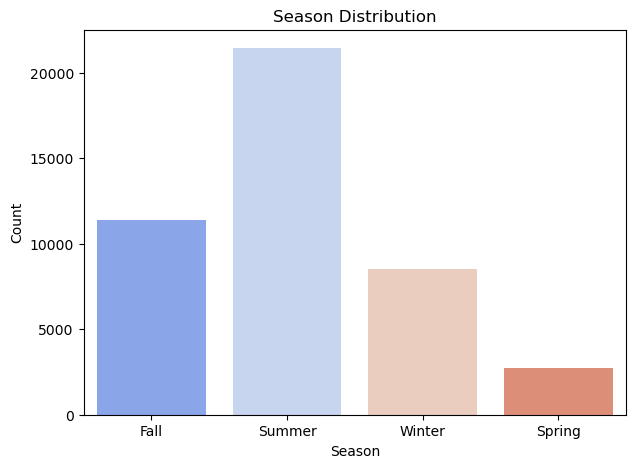

In [45]:
# Count plot for season
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='season', palette='coolwarm')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()



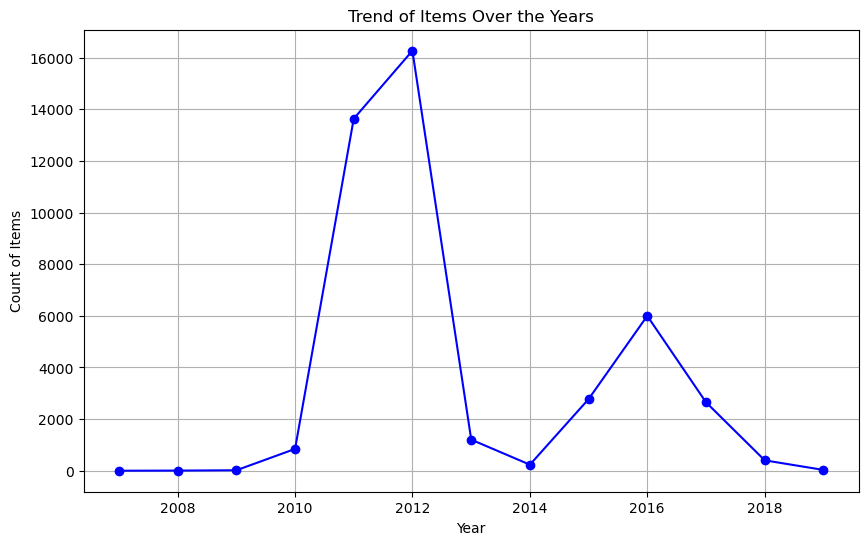

In [47]:
# Group by year and count
yearly_count = df['year'].value_counts().sort_index()

# Line plot for year trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_count.index, yearly_count.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Items Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Items')
plt.grid(True)
plt.show()


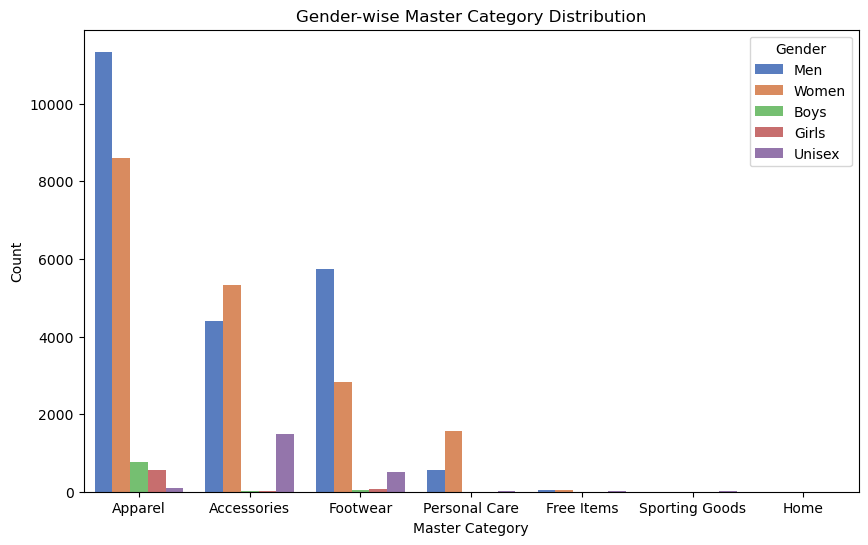

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='masterCategory', hue='gender', palette='muted')
plt.title('Gender-wise Master Category Distribution')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Define constants
img_width, img_height = 224, 224
path = r"C:/Users/ADMIN/Downloads/archive/"

# Load the model (VGG16 in this case)
model1 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Function to construct image path
def img_path(img_name):
    return os.path.join(path, 'images', img_name)

# Function to predict embeddings for a single image
def model_predict(model, img_name):
    try:
        # Load and preprocess image
        img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Predict and flatten embeddings
        return model.predict(x).reshape(-1)
    except Exception as e:
        print(f"Error processing {img_name}: {e}")
        return np.zeros((7 * 7 * 512,))  # Placeholder for failed cases

# Load and copy the DataFrame
csv_path = r"C:/Users/ADMIN/Documents/styles.csv"
df = pd.read_csv(csv_path, on_bad_lines='skip')

if 'image_name' not in df.columns:
    raise ValueError("The 'image_name' column is missing from the CSV file.")

# Slice the DataFrame to include only the first 5000 rows
df_copy1 = df.copy().iloc[:5000]

# Apply the model to generate embeddings
df_copy1['embeddings'] = df_copy1['image_name'].apply(lambda img_name: model_predict(model1, img_name))

# Convert the embeddings column into separate DataFrame columns
df_embedding1 = pd.DataFrame(df_copy1['embeddings'].to_list(), index=df_copy1.index)

# Display the first few rows of the embeddings
print(df_embedding1.head())

# Save the embeddings DataFrame to a CSV file
output_path = r"C:/Users/ADMIN/Documents/embeddings_5000.csv"
df_embedding1.to_csv(output_path, index=False)
print(f"Embeddings for 5000 images saved to {output_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1

Shape of embeddings: (5000, 25088)
Target Image: 1855.jpg


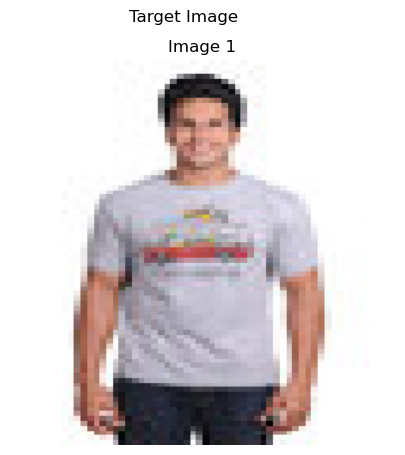

Recommended Images: ['43500.jpg', '16554.jpg', '1853.jpg', '8315.jpg', '22368.jpg']
Similarity Scores: [0.7251839782664105, 0.7113569872652798, 0.7028022050708151, 0.698640705466686, 0.6924263081571685]


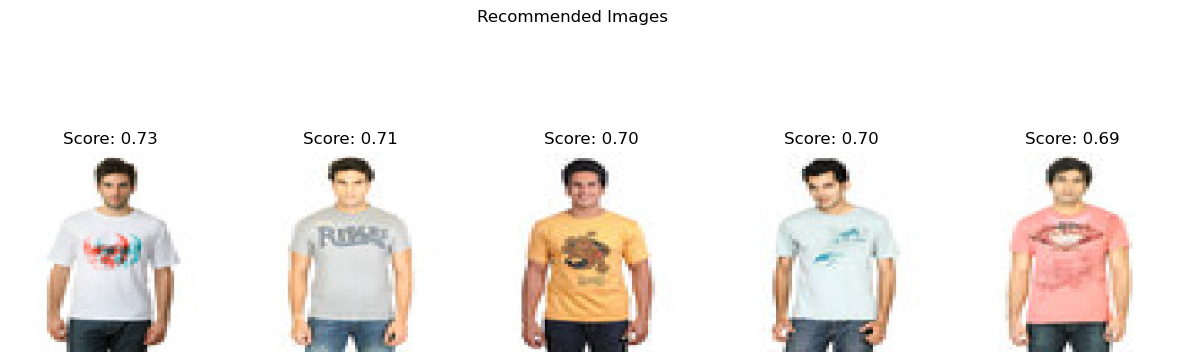

In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define constants
img_width, img_height = 224, 224
path = r"C:/Users/ADMIN/Downloads/archive/images/"

# Load embeddings from the saved file
embeddings_path = r"C:/Users/ADMIN/Documents/embeddings_5000.csv"
embeddings_df = pd.read_csv(embeddings_path)

# Convert embeddings DataFrame to a numpy array and normalize
embeddings = embeddings_df.values
embeddings = normalize(embeddings, axis=1)  # Normalize embeddings

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Load the original CSV file to retrieve image names
csv_path = r"C:/Users/ADMIN/Documents/styles.csv"
styles_df = pd.read_csv(csv_path, on_bad_lines='skip')

# Ensure only 5000 images are used (align with embeddings)
image_names = styles_df.iloc[:5000]['image_name'].values

# Function to calculate cosine similarity and recommend products
def recommend_products(embeddings, target_index, top_n=5):
    """
    Recommend products based on cosine similarity.

    Args:
        embeddings: numpy array of normalized embeddings.
        target_index: index of the target image in the embeddings.
        top_n: number of similar products to recommend.

    Returns:
        List of tuples (index, similarity score) for the top_n similar products.
    """
    similarities = cosine_similarity([embeddings[target_index]], embeddings)
    similarity_scores = similarities[0]
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]
    return [(idx, similarity_scores[idx]) for idx in similar_indices]

# Function to display images
def display_images(image_names, base_path, title, similarity_scores=None):
    """
    Display a grid of images with optional similarity scores.

    Args:
        image_names: list of image filenames.
        base_path: path to the images directory.
        title: title of the plot.
        similarity_scores: list of similarity scores corresponding to the images.
    """
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_names):
        img_path = os.path.join(base_path, img_name)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        plt.subplot(1, len(image_names), i + 1)
        plt.imshow(img)
        plt.axis('off')
        if similarity_scores:
            plt.title(f"Score: {similarity_scores[i]:.2f}")
        else:
            plt.title(f"Image {i + 1}")
    plt.suptitle(title)
    plt.show()

# Select a target image (e.g., index 10)
target_index = 5

# Get recommendations
recommendations = recommend_products(embeddings, target_index, top_n=5)
recommended_indices = [idx for idx, score in recommendations]
similarity_scores = [score for idx, score in recommendations]
recommended_image_names = [image_names[idx] for idx in recommended_indices]

# Display the target image
print(f"Target Image: {image_names[target_index]}")
display_images([image_names[target_index]], path, "Target Image")

# Display the recommended images
print(f"Recommended Images: {recommended_image_names}")
print(f"Similarity Scores: {similarity_scores}")
display_images(recommended_image_names, path, "Recommended Images", similarity_scores)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

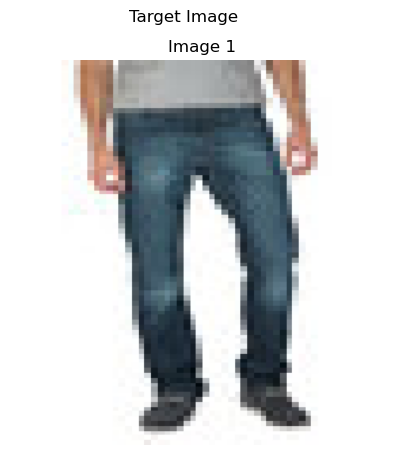

Recommended Images: ['11347.jpg', '39381.jpg', '26152.jpg', '12333.jpg', '11349.jpg']
Similarity Scores: [0.73911965, 0.7145735, 0.70155895, 0.70000094, 0.69851667]


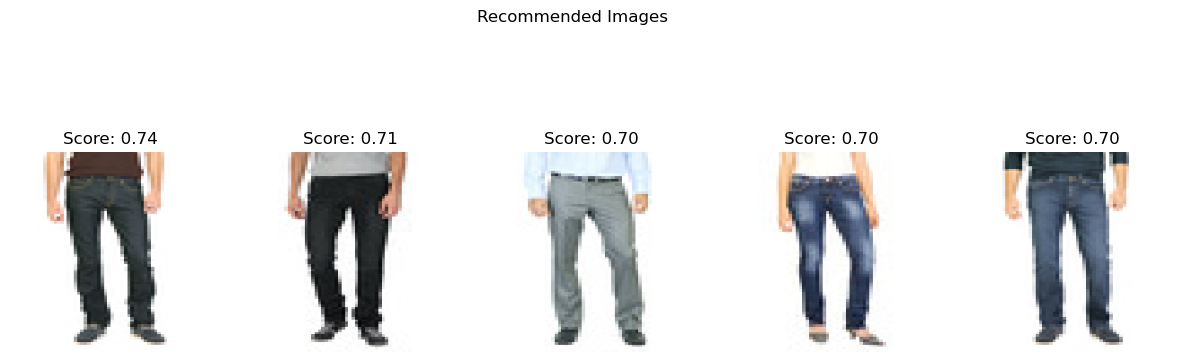

In [18]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Define constants
img_width, img_height = 224, 224
path = r"C:/Users/ADMIN/Downloads/archive/images/"

# Load the model
model = ResNet50(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

# Function to extract embeddings for an image
def extract_embeddings(img_name, model):
    """
    Extract embeddings from the model for a given image.

    Args:
        img_name: name of the image file.
        model: pre-trained model to extract embeddings.

    Returns:
        Flattened feature embeddings for the image.
    """
    img_path = os.path.join(path, img_name)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Load the original CSV file to retrieve image names
csv_path = r"C:/Users/ADMIN/Documents/styles.csv"
styles_df = pd.read_csv(csv_path, on_bad_lines="skip")

# Ensure only 5000 images are used
image_names = styles_df.iloc[:2000]['image_name'].values

# Extract embeddings for all images and save to a file
embeddings = []
for img_name in image_names:
    try:
        embeddings.append(extract_embeddings(img_name, model))
    except Exception as e:
        print(f"Error processing {img_name}: {e}")
embeddings = np.array(embeddings)

# Save embeddings to a CSV file (optional)
embeddings_path = r"C:/Users/ADMIN/Documents/embeddings_resnet50.csv"
pd.DataFrame(embeddings).to_csv(embeddings_path, index=False)

# Normalize embeddings
embeddings = normalize(embeddings, axis=1)

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Function to calculate cosine similarity and recommend products
def recommend_products(embeddings, target_index, top_n=5):
    """
    Recommend products based on cosine similarity.

    Args:
        embeddings: numpy array of normalized embeddings.
        target_index: index of the target image in the embeddings.
        top_n: number of similar products to recommend.

    Returns:
        List of tuples (index, similarity score) for the top_n similar products.
    """
    similarities = cosine_similarity([embeddings[target_index]], embeddings)
    similarity_scores = similarities[0]
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]
    return [(idx, similarity_scores[idx]) for idx in similar_indices]

# Function to display images
def display_images(image_names, base_path, title, similarity_scores=None):
    """
    Display a grid of images with optional similarity scores.

    Args:
        image_names: list of image filenames.
        base_path: path to the images directory.
        title: title of the plot.
        similarity_scores: list of similarity scores corresponding to the images.
    """
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_names):
        img_path = os.path.join(base_path, img_name)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        plt.subplot(1, len(image_names), i + 1)
        plt.imshow(img)
        plt.axis('off')
        if similarity_scores:
            plt.title(f"Score: {similarity_scores[i]:.2f}")
        else:
            plt.title(f"Image {i + 1}")
    plt.suptitle(title)
    plt.show()

# Select a target image (e.g., index 10)
target_index = 1

# Get recommendations
recommendations = recommend_products(embeddings, target_index, top_n=5)
recommended_indices = [idx for idx, score in recommendations]
similarity_scores = [score for idx, score in recommendations]
recommended_image_names = [image_names[idx] for idx in recommended_indices]

# Display the target image
print(f"Target Image: {image_names[target_index]}")
display_images([image_names[target_index]], path, "Target Image")

# Display the recommended images
print(f"Recommended Images: {recommended_image_names}")
print(f"Similarity Scores: {similarity_scores}")
display_images(recommended_image_names, path, "Recommended Images", similarity_scores)


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define constants
img_width, img_height = 224, 224
path = r"C:/Users/ADMIN/Downloads/archive/images/"

# Load ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Load embeddings from the saved file
embeddings_path = r"C:/Users/ADMIN/Documents/embeddings_resnet50.csv"
embeddings_df = pd.read_csv(embeddings_path)

# Convert embeddings DataFrame to a numpy array and normalize
embeddings = embeddings_df.values
embeddings = normalize(embeddings, axis=1)  # Normalize embeddings

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Load the original CSV file to retrieve image names
csv_path = r"C:/Users/ADMIN/Documents/styles.csv"
styles_df = pd.read_csv(csv_path, on_bad_lines='skip')

# Ensure only 5000 images are used (align with embeddings)
image_names = styles_df.iloc[:5000]['image_name'].values

# Function to calculate cosine similarity and recommend products
def recommend_products(embeddings, target_index, top_n=5):
    """
    Recommend products based on cosine similarity.

    Args:
        embeddings: numpy array of normalized embeddings.
        target_index: index of the target image in the embeddings.
        top_n: number of similar products to recommend.

    Returns:
        List of tuples (index, similarity score) for the top_n similar products.
    """
    similarities = cosine_similarity([embeddings[target_index]], embeddings)
    similarity_scores = similarities[0]
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]
    return [(idx, similarity_scores[idx]) for idx in similar_indices]

# Function to display images
def display_images(image_names, base_path, title, similarity_scores=None):
    """
    Display a grid of images with optional similarity scores.

    Args:
        image_names: list of image filenames.
        base_path: path to the images directory.
        title: title of the plot.
        similarity_scores: list of similarity scores corresponding to the images.
    """
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_names):
        img_path = os.path.join(base_path, img_name)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        plt.subplot(1, len(image_names), i + 1)
        plt.imshow(img)
        plt.axis('off')
        if similarity_scores:
            plt.title(f"Score: {similarity_scores[i]:.2f}")
        else:
            plt.title(f"Image {i + 1}")
    plt.suptitle(title)
    plt.show()

# Select a target image (e.g., index 10)
target_index = 5

# Get recommendations
recommendations = recommend_products(embeddings, target_index, top_n=5)
recommended_indices = [idx for idx, score in recommendations]
similarity_scores = [score for idx, score in recommendations]
recommended_image_names = [image_names[idx] for idx in recommended_indices]

# Display the target image
print(f"Target Image: {image_names[target_index]}")
display_images([image_names[target_index]], path, "Target Image")

# Display the recommended images
print(f"Recommended Images: {recommended_image_names}")
print(f"Similarity Scores: {similarity_scores}")
display_images(recommended_image_names, path, "Recommended Images", similarity_scores)
